In [2]:
# Проект e-learning

# Описание данных:
    
# assessments.csv — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).
# code_module — идентификационный код предмета.
# code_presentation — семестр (Идентификационный код).
# id_assessment — тест (Идентификационный номер ассессмента).
# assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).
# date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).
# weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

# courses.csv — файл содержит список предметов по семестрам.
# code_module — предмет (идентификационный код).
# code_presentation — семестр (идентификационный код).
# module_presentation_length — продолжительность семестра в днях.

# studentAssessment.csv — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
# id_assessment — тест (идентификационный номер).
# id_student — идентификационный номер студента.
# date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.
# is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).
# score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

# studentRegistration.csv — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
# code_module — предмет (идентификационный код).
# code_presentation — семестр (идентификационный код)
# id_student — идентификационный номер студента.
# date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).
# date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

%matplotlib inline

In [ ]:
# загрузка данных

In [2]:
assessments = pd.read_csv("assessments.csv" , encoding = 'windows-1251' , sep = ',')

In [3]:
studentRegistration = pd.read_csv("studentRegistration.csv" , encoding = 'windows-1251' , sep = ',')

In [4]:
courses =  pd.read_csv("courses.csv" , encoding = 'windows-1251' , sep = ',')

In [5]:
studentAssessment = pd.read_csv('studentAssessment.csv' , encoding = 'windows-1251' , sep = ',')

In [6]:
assessments.head(4)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0


In [7]:
assessments.shape


(206, 6)

Сгруппируем данные о предметах по семестрам, типам и количеству тестов, а также выведем удельный вес каждого

In [8]:
grouping_test = assessments.groupby(['code_presentation','code_module', 'assessment_type','weight'], as_index = False)\
                .agg({'id_assessment':'count'}) \
                .rename(columns=({'id_assessment':'amount'}))\
                .sort_values(['code_presentation','code_module','amount'])

In [9]:
grouping_test.head(4)

,code_presentation,code_module,assessment_type,weight,amount
1,2013B,BBB,Exam,100.0,1
2,2013B,BBB,TMA,5.0,1
0,2013B,BBB,CMA,1.0,5
3,2013B,BBB,TMA,18.0,5


Гипотеза 1: Предположим, что курсом является все Exam, CMA и TMA  по предмету (идентификационный код предмета) за весь выбранный промежуток времени (2013-2014 года).

In [10]:
hyp_1 = assessments.groupby(['code_module','assessment_type','weight'])\
            .agg({'assessment_type':'count'}).rename(columns=({'assessment_type':'amount'})).reset_index()

In [11]:
hyp_1.head(5)

,code_module,assessment_type,weight,amount
0,AAA,Exam,100.0,2
1,AAA,TMA,10.0,2
2,AAA,TMA,20.0,6
3,AAA,TMA,30.0,2
4,BBB,CMA,1.0,15


<Figure size 2000x1600 with 0 Axes>

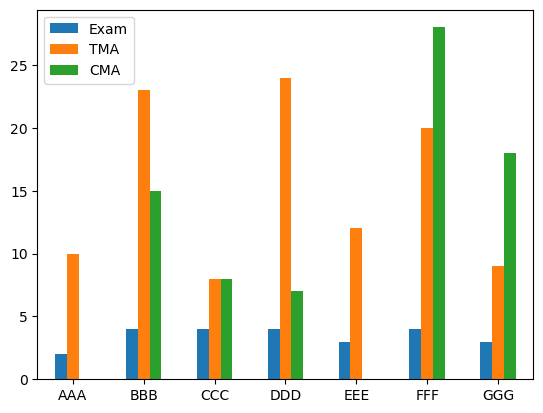

In [12]:
plt.figure(figsize=(20,16))
>>> Exam = [2, 4, 4, 4, 3, 4, 3 ]
>>> TMA = [10, 23, 8, 24, 12, 20, 9]
>>> CMA  = [0,15 ,8, 7, 0, 28, 18]
>>> index = ['AAA', 'BBB', 'CCC',
...          'DDD', 'EEE', 'FFF', 'GGG']
>>> df = pd.DataFrame({'Exam': Exam,
...                    'TMA': TMA, 'CMA': CMA}, index=index)
>>> ax = df.plot.bar(rot=0)


 Преобразуем данные до более "читаемого" вида. Сгруппируем наши предметы по типам теста и удельному весу за каждый тест и построим таблицу
    

In [13]:
data = hyp_1.pivot(columns='code_module', index=['assessment_type','weight']).sort_values('weight')

In [14]:
style_table = (data
     .style
     .set_caption('Grouping courses by Exam, TMA, CMA and test scores')
     .background_gradient(cmap='viridis')
     .highlight_null('white')
     .format("{:0}", na_rep=""))

In [15]:
style_table

In [16]:
grouping_test.query("code_module =='AAA'")

,code_presentation,code_module,assessment_type,weight,amount
17,2013J,AAA,Exam,100.0,1
18,2013J,AAA,TMA,10.0,1
20,2013J,AAA,TMA,30.0,1
19,2013J,AAA,TMA,20.0,3
65,2014J,AAA,Exam,100.0,1
66,2014J,AAA,TMA,10.0,1
68,2014J,AAA,TMA,30.0,1
67,2014J,AAA,TMA,20.0,3


Посчитаем, сколько по всем типам тестов, в рамках одного кода предмета, можно набрать удельного веса в течении одного семестра, при этом "дропнем" результаты за экзамен, т.к мы знаем что за него дают 100% удельного веса в оценке


In [17]:
hyp_1 = grouping_test.set_index('assessment_type').drop(['Exam'], axis=0)

In [18]:
hyp_1['total_weight_assessment'] = hyp_1['weight'] * hyp_1['amount']

In [19]:
hyp_1.groupby(['code_presentation','code_module']).agg({'total_weight_assessment':'sum'})

total_weight_assessment
code_presentation code_module                         
2013B             BBB                            100.0
                  DDD                            100.0
                  FFF                            100.0
2013J             AAA                            100.0
                  BBB                            100.0
                  DDD                            100.0
                  EEE                            100.0
                  FFF                            100.0
                  GGG                              0.0
2014B             BBB                            100.0
                  CCC                            100.0
                  DDD                            100.0
                  EEE                            100.0
                  FFF                            100.0
                  GGG                              0.0
2014J             AAA                            100.0
                  BBB                            100.0
                  CCC                            100.0
                  DDD                            100.0
                  EEE                            100.0
                  FFF                            100.0
                  GGG                              0.0

Теперь посмотрим на данные, в разрезе одного семестра, кода предмета и номера ассессмента

In [20]:

pa_2013B = assessments.query("code_presentation =='2013B'")\
            .groupby(['code_presentation','code_module','id_assessment','assessment_type'])\
            .agg({'id_assessment':'count'})\
            .rename(columns=({'id_assessment':'amount'}))\
            .reset_index()
pa_2013B =pa_2013B.pivot( index=['code_module','code_presentation','assessment_type'], columns='id_assessment', values='amount')
pa_2013B = (pa_2013B
     .style
     .highlight_max()
     .highlight_null('white')
     .format("{:0}", na_rep=""))
pa_2013B

Таблица 3.1  - Семестр 2013B. Группировка по коду предмета и номеру ассесмента 

In [21]:
pa_2013J = assessments.query("code_presentation =='2013J'")\
            .groupby(['code_presentation','code_module','id_assessment','assessment_type'])\
            .agg({'id_assessment':'count'})\
            .rename(columns=({'id_assessment':'amount'}))\
            .reset_index()
pa_2013J =pa_2013J.pivot( index=['code_module','code_presentation','assessment_type'], columns='id_assessment', values='amount')
pa_2013J = (pa_2013J
     .style
     .highlight_max()
     .highlight_null('white')
     .format("{:0}", na_rep=""))
pa_2013J

Таблица 3.2  - Семестр 2013J. Группировка по коду предмета и номеру ассесмента 

In [23]:
pa_2014B = assessments.query("code_presentation =='2014B'")\
            .groupby(['code_presentation','code_module','id_assessment','assessment_type'])\
            .agg({'id_assessment':'count'})\
            .rename(columns=({'id_assessment':'amount'}))\
            .reset_index()
pa_2014B =pa_2014B.pivot( index=['code_module','code_presentation','assessment_type'], columns='id_assessment', values='amount')
pa_2014B = (pa_2014B
     .style
     .highlight_max()
     .highlight_null('white')
     .format("{:0}", na_rep=""))
pa_2014B

Таблица 3.3 - Семестр 2013B. Группировка по коду предмета и номеру ассесмента

In [24]:
pa_2014J = assessments.query("code_presentation =='2014J'")\
            .groupby(['code_presentation','code_module','id_assessment','assessment_type'])\
            .agg({'id_assessment':'count'})\
            .rename(columns=({'id_assessment':'amount'}))\
            .reset_index()
pa_2014J =pa_2014J.pivot( index=['code_module','code_presentation','assessment_type'], columns='id_assessment', values='amount')
pa_2014J = (pa_2014J
     .style
     .highlight_max()
     .highlight_null('white')
     .format("{:0}", na_rep=""))
pa_2014J

Таблица 3.4 - Семестр 2013J. Группировка по коду предмета и номеру ассесмента

In [25]:
Exam_id_assessment = [14990, 25340, 34872, 1757, 15002, 25354, 30713, 34885, 37424, 15014, 24290, 25361, 30718, 34898, 37434, 40087, 1763, 15025, 24299, 25368, 30723, 34911, 37444, 40088 ]

In [26]:

Exam_score = studentAssessment.loc[studentAssessment.id_assessment.isin(Exam_id_assessment)] # Отфильтруем данные только по Exam

In [27]:
Exam_score

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
...,...,...,...,...,...
95980,25368,652680,243,0,91.0
95981,25368,652732,249,0,47.0
95982,25368,652965,242,0,87.0
95983,25368,653051,242,0,27.0


In [28]:
Exam_score.id_assessment.unique()

array([24290, 24299, 25340, 25354, 25361, 25368], dtype=int64)

In [29]:
df = pd.DataFrame({
    'assessments.query' : ['24290', '24299', '25340', '25354','25361','25368'],
    'code_module' : ['CCC', 'CCC', 'DDD', 'DDD', 'DDD', 'DDD' ],
    'code_presentation' : ['2014B', '2014J', '2013B', '2013J', '2014B', '2014J']
}).sort_values('code_presentation')

In [30]:
df

,assessments.query,code_module,code_presentation
2,25340,DDD,2013B
3,25354,DDD,2013J
0,24290,CCC,2014B
4,25361,DDD,2014B
1,24299,CCC,2014J
5,25368,DDD,2014J


1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) 
Ответ : 19 955 человек

Сначала приступим к объединению таблиц: 

In [31]:
student_score = (studentAssessment
#
     .merge(assessments,
#
            how='inner',
            on = 'id_assessment')
     .merge(courses,
#        
            how='inner',
            on = ['code_module','code_presentation'])
     .merge(studentRegistration,
#            
            how='inner',
            on = ['id_student','code_module','code_presentation',])
                )

In [32]:
student_score.shape

(173912, 13)

In [33]:
student_score.head(4)


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268,-159.0,NaN
1,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0,268,-159.0,NaN
2,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0,268,-159.0,NaN
3,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0,268,-159.0,NaN


In [34]:
student_score['date_unregistration'] = student_score['date_unregistration']. fillna (0)

In [35]:
passed_cources = student_score.query("date_unregistration ==0")\
            .groupby(['id_student','code_module','code_presentation'], as_index = False)\
            .agg({'id_assessment':'count'})\
            .rename(columns=({'id_assessment':'passed_assessment'}))

In [36]:
passed_cources.id_student.nunique() # Количество студентов, которые успешно сдали один курс

19955

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью (кол-во успешных экзаменов / кол-во всех попыток сдать экзамен)

In [37]:
Exam_score

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
...,...,...,...,...,...
95980,25368,652680,243,0,91.0
95981,25368,652732,249,0,47.0
95982,25368,652965,242,0,87.0
95983,25368,653051,242,0,27.0


In [38]:
Exam_score.id_assessment.unique()

array([24290, 24299, 25340, 25354, 25361, 25368], dtype=int64)

Разделим данные из колонки score на 2 сегмента : те кто набрал больше или равно 40 баллов на экзамене - Сдали экзамен, и меньше 40 - не сдали

In [39]:
bins = [ 0, 39, 100]

In [40]:
labels = ['No', 'Yes']

In [41]:
Exam_score['passed_exam'] = pd.cut(Exam_score['score'], bins = bins , labels = labels)

C:\Users\skala\AppData\Local\Temp\ipykernel_4152\199284237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exam_score['passed_exam'] = pd.cut(Exam_score['score'], bins = bins , labels = labels)


In [42]:
Exam_score

,id_assessment,id_student,date_submitted,is_banked,score,passed_exam
52923,24290,558914,230,0,32.0,No
52924,24290,559706,234,0,78.0,Yes
52925,24290,559770,230,0,54.0,Yes
52926,24290,560114,230,0,64.0,Yes
52927,24290,560311,234,0,100.0,Yes
...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,Yes
95981,25368,652732,249,0,47.0,Yes
95982,25368,652965,242,0,87.0,Yes
95983,25368,653051,242,0,27.0,No


In [43]:
Exam_score_group = Exam_score.groupby(['id_assessment','passed_exam'], as_index=False)\
                            .agg({'id_student':'count'})\
                            .rename(columns=({'id_student':'amount'}))\
                            .pivot(columns = 'passed_exam', index='id_assessment', values = 'amount')

In [44]:
Exam_score_group

passed_exam,No,Yes
id_assessment,,
24290,83,664
24299,149,1019
25340,96,504
25354,90,878
25361,39,485
25368,107,842


In [46]:
Exam_score_group['Total']=Exam_score_group['No']+Exam_score_group['Yes'] # Общее количество попыток сдать экзамен (успешные и неуспешные)
Exam_score_group['Completion'] = (Exam_score_group['Yes']/Exam_score_group['Total']*100).round(2)  # Считаем завершаемость экзаменов

In [47]:
Exam_score_group.sort_values('Completion')

passed_exam,No,Yes,Total,Completion
id_assessment,,,,
25340,96,504,600,84.00
24299,149,1019,1168,87.24
25368,107,842,949,88.72
24290,83,664,747,88.89
25354,90,878,968,90.70
25361,39,485,524,92.56


3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

In [48]:
exam_mean_time = student_score.loc[student_score.id_assessment.isin(Exam_id_assessment)]

In [49]:
exam_mean_time_succesfull = exam_mean_time.loc[exam_mean_time.score >=40] #  отфильтровали все успешные сдачи экзаменов , т.е где набрали более 40 баллов


In [50]:
exam_mean_time_succesfull.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration
46189,24290,29764,230,0,94.0,CCC,2014B,Exam,NaN,100.0,241,-34.0,0.0
46198,24290,29820,230,0,76.0,CCC,2014B,Exam,NaN,100.0,241,-57.0,0.0
46205,24290,40604,234,0,66.0,CCC,2014B,Exam,NaN,100.0,241,-17.0,0.0


In [51]:
df

,assessments.query,code_module,code_presentation
2,25340,DDD,2013B
3,25354,DDD,2013J
0,24290,CCC,2014B
4,25361,DDD,2014B
1,24299,CCC,2014J
5,25368,DDD,2014J


In [52]:
DDD_2013B = round(exam_mean_time_succesfull.query("code_module =='DDD' and code_presentation =='2013B'")['date_submitted'].mean(), 0)

In [53]:
DDD_2013J = round(exam_mean_time_succesfull.query("code_module =='DDD' and code_presentation =='2013J'")['date_submitted'].mean(), 0)

In [54]:
CCC_2014B = round(exam_mean_time_succesfull.query("code_module =='CCC' and code_presentation =='2014B'")['date_submitted'].mean(), 0)

In [55]:
DDD_2014B=round(exam_mean_time_succesfull.query("code_module =='DDD' and code_presentation =='2014B'")['date_submitted'].mean(), 0)

In [56]:
CCC_2014J = round(exam_mean_time_succesfull.query("code_module =='CCC' and code_presentation =='2014J'")['date_submitted'].mean(), 0)

In [57]:
DDD_2014J = round(exam_mean_time_succesfull.query("code_module =='DDD' and code_presentation =='2014J'")['date_submitted'].mean(), 0)

Ответ:

In [58]:
class Type:
    code_module=['DDD','CCC']
    code_presentation=['2013B','2013J','2014B','2014J']
    list = [DDD_2013B, DDD_2013J, CCC_2014B , DDD_2014B, CCC_2014J, DDD_2014J]
print("Средний срок сдачи экзамена по предмету с идентификационным номером {t.code_module[0]} в семестре {t.code_presentation[0]} составляет {t.list[0]} дней c начала семестра".format(t=Type()))
print()
print("Средний срок сдачи экзамена по предмету с идентификационным номером {t.code_module[0]} в семестре {t.code_presentation[1]} составляет {t.list[1]} дней c начала семестра".format(t=Type()))
print()
print("Средний срок сдачи экзамена по предмету с идентификационным номером {t.code_module[1]} в семестре {t.code_presentation[2]} составляет {t.list[2]} дней c начала семестра".format(t=Type()))
print()
print("Средний срок сдачи экзамена по предмету с идентификационным номером {t.code_module[0]} в семестре {t.code_presentation[2]} составляет {t.list[3]} дней c начала семестра".format(t=Type()))
print()
print("Средний срок сдачи экзамена по предмету с идентификационным номером {t.code_module[1]} в семестре {t.code_presentation[3]} составляет {t.list[4]} дней c начала семестра".format(t=Type()))
print()
print("Средний срок сдачи экзамена по предмету с идентификационным номером {t.code_module[0]} в семестре {t.code_presentation[3]} составляет {t.list[5]} дней c начала семестра".format(t=Type()))

Средний срок сдачи экзамена по предмету с идентификационным номером DDD в семестре 2013B составляет 230.0 дней c начала семестра

Средний срок сдачи экзамена по предмету с идентификационным номером DDD в семестре 2013J составляет 240.0 дней c начала семестра

Средний срок сдачи экзамена по предмету с идентификационным номером CCC в семестре 2014B составляет 232.0 дней c начала семестра

Средний срок сдачи экзамена по предмету с идентификационным номером DDD в семестре 2014B составляет 235.0 дней c начала семестра

Средний срок сдачи экзамена по предмету с идентификационным номером CCC в семестре 2014J составляет 244.0 дней c начала семестра

Средний срок сдачи экзамена по предмету с идентификационным номером DDD в семестре 2014J составляет 243.0 дней c начала семестра


4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3)

Чтобы определить ТОП-3 популярных предмета, достаточно взять наш объедененный датафрейм, сгуппировать по предмету и семестру и отфильтровать по количеству регистраций на предмет.

In [59]:
popular_module = student_score.groupby(['code_module','code_presentation'])\
                            .agg({'date_registration':'count'})\
                            .rename(columns=({'date_registration':'number_registrations'}))\
                            .sort_values('number_registrations', ascending=False).head(3)

In [60]:
popular_module

number_registrations
code_module code_presentation                      
FFF         2013J                             16240
            2014J                             16184
BBB         2013J                             14375

In [61]:
unpopular_module = student_score.query("date_unregistration !=0")\
             .groupby(['code_module','code_presentation'])\
             .agg({'date_registration':'count'})\
             .rename(columns=({'date_registration':'number_unregistrations'}))\
             .sort_values('number_unregistrations', ascending=False).head(3)

In [62]:
unpopular_module

,,number_unregistrations
code_module,code_presentation,
CCC,2014J,1476
DDD,2013B,1186
CCC,2014B,1053


5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. 

In [63]:
student_score['passed_test'] = pd.cut(student_score['score'], bins = bins , labels = labels)

In [64]:
student_score.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration,passed_test
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268,-159.0,0.0,Yes
1,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0,268,-159.0,0.0,Yes
2,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0,268,-159.0,0.0,Yes


In [65]:
low_completion = student_score.groupby(['code_presentation','passed_test'], as_index=False)\
                            .agg({'id_student':'count'})\
                            .rename(columns=({'id_student':'amount'}))\
                            .pivot(columns = 'passed_test', index='code_presentation', values = 'amount')
low_completion['Total']=low_completion['No']+low_completion['Yes'] 
low_completion['Completion'] = (low_completion['Yes']/low_completion['Total']*100).round(2)  # Считаем завершаемость в семестре

In [66]:
low_completion.Completion.sort_values()

code_presentation
2014J    94.77
2014B    95.68
2013B    95.83
2013J    97.04
Name: Completion, dtype: float64

In [67]:
round(student_score.groupby(['code_presentation'])['date_submitted'].mean().sort_values(), 0)

code_presentation
2013B    111.0
2014B    114.0
2014J    117.0
2013J    120.0
Name: date_submitted, dtype: float64

In [ ]:
Cеместр с самыми долгими средними сроками сдачи курсов - 2013J, 120 дней с начала семестра.

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [68]:
Course_DDD_2013B = [25340, 25334, 25335, 25336, 25337, 25338, 25339, 25341, 25342, 25343, 25344, 25345, 253456, 25347]

In [69]:
Course_DDD_2013B_score = student_score.loc[student_score.id_assessment.isin(Course_DDD_2013B)] # Выберем результаты по курсу DDD в 2013B cеместре


In [70]:
Course_DDD_2013B_score = Course_DDD_2013B_score.loc[Course_DDD_2013B_score['is_banked'] == 0] 

In [71]:
Course_DDD_2013B_score['overvalue']= Course_DDD_2013B_score['score'] * Course_DDD_2013B_score['weight']/100 # Это колонка позволит нам более точно рассчитать параметр Monetary - среднее количесвто баллов, с учетом сдачи каждого теста и его веса в оценке за курс

In [72]:
Course_DDD_2013B_score['delta'] = Course_DDD_2013B_score['date_submitted'] - Course_DDD_2013B_score['date'] # Разница между фактической и плановой сдачей теста или экзамена. Для рассчета Recency - среднего времени сдачи тестов и экзамена

In [ ]:
Рассчитаeм Recency, Frequency, Monetary для каждого студента

In [73]:
RFM_score = Course_DDD_2013B_score.groupby(['id_student'])\
                     .agg({'delta':'mean','id_assessment':'count', 'overvalue':'sum'})\
                     .sort_values('delta').sort_values('id_assessment', ascending=False)\
                     .rename(columns=({ 'delta':'Recency','id_assessment':'Frequency','overvalue':'Monetary'})).reset_index()

In [74]:
RFM_score

,id_student,Recency,Frequency,Monetary
0,298040,0.615385,13,146.980
1,548473,0.692308,13,98.580
2,2358423,0.769231,13,108.760
3,542293,0.769231,13,134.890
4,187623,0.769231,13,90.905
...,...,...,...,...
1053,548132,2.000000,1,1.140
1054,479347,2.000000,1,1.060
1055,529525,2.000000,1,0.540
1056,2607945,2.000000,1,0.940


In [75]:
quintiles = RFM_score[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles


{'Recency': {0.2: -0.46153846153846156,
  0.4: 0.2681818181818184,
  0.6: 1.0,
  0.8: 1.969230769230771},
 'Frequency': {0.2: 4.0, 0.4: 9.0, 0.6: 12.0, 0.8: 13.0},
 'Monetary': {0.2: 13.599,
  0.4: 43.541000000000004,
  0.6: 102.446,
  0.8: 135.391}}

In [76]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

In [77]:
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [85]:
RFM_score['R']  = RFM_score['Recency'].apply( lambda x:r_score(x))
RFM_score['F']  = RFM_score['Frequency'].apply( lambda x: fm_score(x, 'Frequency'))
RFM_score['M']  = RFM_score['Monetary'].apply( lambda x: fm_score(x, 'Monetary'))

In [86]:
RFM_score

,id_student,Recency,Frequency,Monetary,R,F,M
0,298040,0.615385,13,146.980,3,4,5
1,548473,0.692308,13,98.580,3,4,3
2,2358423,0.769231,13,108.760,3,4,4
3,542293,0.769231,13,134.890,3,4,4
4,187623,0.769231,13,90.905,3,4,3
...,...,...,...,...,...,...,...
1053,548132,2.000000,1,1.140,1,1,1
1054,479347,2.000000,1,1.060,1,1,1
1055,529525,2.000000,1,0.540,1,1,1
1056,2607945,2.000000,1,0.940,1,1,1


In [89]:
RFM_score['RFM Score'] = RFM_score['R'].map(str) + RFM_score['F'].map(str) + RFM_score['M'].map(str)
RFM_score.tail(155)

,id_student,Recency,Frequency,Monetary,R,F,M,RFM Score
903,334294,1.333333,3,7.945,2,1,1,211
904,540759,1.333333,3,5.260,2,1,1,211
905,2628025,2.000000,3,8.285,1,1,1,111
906,474153,1.333333,3,2.115,2,1,1,211
907,558308,-1.000000,3,8.540,5,1,1,511
...,...,...,...,...,...,...,...,...
1053,548132,2.000000,1,1.140,1,1,1,111
1054,479347,2.000000,1,1.060,1,1,1,111
1055,529525,2.000000,1,0.540,1,1,1,111
1056,2607945,2.000000,1,0.940,1,1,1,111


In [90]:
RFM_score.Recency.describe()

count    1058.000000
mean        0.807304
std         4.336991
min       -27.000000
25%        -0.230769
50%         0.615385
75%         1.622596
max       123.000000
Name: Recency, dtype: float64

In [91]:
RFM_score.Frequency.describe()

count    1058.000000
mean        9.203214
std         4.232964
min         1.000000
25%         6.000000
50%        11.000000
75%        13.000000
max        13.000000
Name: Frequency, dtype: float64

In [93]:
RFM_score.Monetary.describe()

count    1058.000000
mean       77.524915
std        56.619723
min         0.000000
25%        19.687500
50%        86.602500
75%       128.567500
max       189.975000
Name: Monetary, dtype: float64

In [94]:
quintiles

{'Recency': {0.2: -0.46153846153846156,
  0.4: 0.2681818181818184,
  0.6: 1.0,
  0.8: 1.969230769230771},
 'Frequency': {0.2: 4.0, 0.4: 9.0, 0.6: 12.0, 0.8: 13.0},
 'Monetary': {0.2: 13.599,
  0.4: 43.541000000000004,
  0.6: 102.446,
  0.8: 135.391}}

Студент-чемпион {R:4-5,M:5} : Cамая способная когорта студентов, сдает все тесты и экзамены досрочно и на самые высокие баллы

Студент-"перспективный"{R:1-2,M:4-5} : Всегда опаздывал со здачей, но получает хорошие отметки

Студент-обыкновенный {R:4-5,M:4} : Сдал вовремя, получил  проходные баллы

Студент-хорошист {R:3,M:4-5}: Редко сдает чуть позже срока, но всегда на высокие проходные баллы

Посредственный {R:1-5,M:3} : Cдавал после дедлайнов, на средние отметки

Оболтус- отчисленный {R:1-5,M:1-2}: cдавал как придется, в итоге был отчислен 

In [232]:
segt_map = {

    r'[1-5][1-2]': 'оболтус-отчисленный',
    r'[1-5]3': 'Посредственный',
    r'3[4-5]':     'Студент хорошист',
    r'[4-5]4':     'Студент-обыкновенный',
    r'[1-2][4-5]':  'Студент-"перспективный"',
    r'[4-5]5':     'Студент-чемпион'
}

RFM_score['Segment'] = RFM_score['R'].map(str) + RFM_score['M'].map(str)
RFM_score['Segment'] = RFM_score['Segment'].replace(segt_map, regex=True)
RFM_score

,id_student,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,298040,0.615385,13,146.980,3,4,5,345,Студент хорошист
1,548473,0.692308,13,98.580,3,4,3,343,Посредственный
2,2358423,0.769231,13,108.760,3,4,4,344,Студент хорошист
3,542293,0.769231,13,134.890,3,4,4,344,Студент хорошист
4,187623,0.769231,13,90.905,3,4,3,343,Посредственный
...,...,...,...,...,...,...,...,...,...
1053,548132,2.000000,1,1.140,1,1,1,111,оболтус-отчисленный
1054,479347,2.000000,1,1.060,1,1,1,111,оболтус-отчисленный
1055,529525,2.000000,1,0.540,1,1,1,111,оболтус-отчисленный
1056,2607945,2.000000,1,0.940,1,1,1,111,оболтус-отчисленный


In [233]:
RFM_score['Segment'].value_counts()

оболтус-отчисленный        423
Посредственный             212
Студент-чемпион            156
Студент-обыкновенный       134
Студент хорошист            89
Студент-"перспективный"     44
Name: Segment, dtype: int64

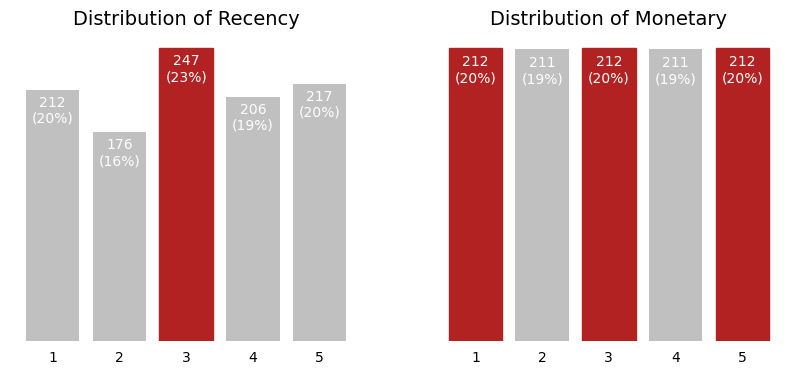

In [236]:
# plot the distribution of customers over R and M
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for i, p in enumerate(['R', 'M']):
    parameters = {'R':'Recency', 'M':'Monetary'}
    y = RFM_score[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

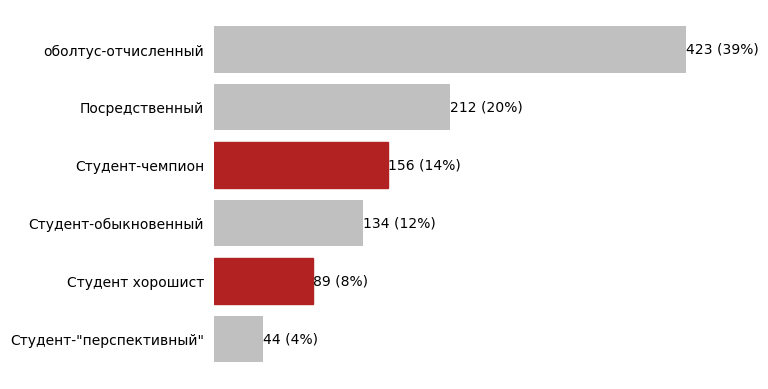

In [241]:
# count the number of customers in each segment
segments_counts = RFM_score['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Студент-чемпион', 'Студент хорошист']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()